# Classification Using Natural Language Processing: 
## Goal: Classify movie reviews as either positive or negative given previously classified IMDB reviews (25,000)

**Data Source: https://ai.stanford.edu/~amaas/data/sentiment/**

In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics

**Load Data**

In [185]:
#Training data
df_train = pd.read_csv('train_set.csv')

In [186]:
#Test data
df_test = pd.read_csv('test_set.csv')

In [187]:
df_train.head()

,reviews,labels
0,This is the kind of film that everyone involve...,0
1,This is one of those landmark films which need...,1
2,"OK, I taped this off TV and missed the very st...",0
3,"Are you a giraffe?... ask John to Nadia, and s...",1
4,Rated E <br /><br />I never actually owned a N...,1


In [188]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
reviews    25000 non-null object
labels     25000 non-null int64
dtypes: int64(1), object(1)
memory usage: 390.7+ KB


In [189]:
df_test.head()

,reviews,labels
0,It's a simple fact that there are many of us f...,1
1,"Hilarious show with so many great stories, tha...",1
2,To identify this movie as a vampire movie woul...,0
3,"That this film flopped at the box office, and ...",1
4,"In Crystal City, a group of Mormons hire the h...",1


In [190]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
reviews    25000 non-null object
labels     25000 non-null int64
dtypes: int64(1), object(1)
memory usage: 390.7+ KB


**Check for missing values**

In [191]:
df_train.isnull().sum() # No null values 

reviews    0
labels     0
dtype: int64

In [192]:
df_test.isnull().sum()

reviews    0
labels     0
dtype: int64

**Investigate effect of string length on whether reviews are pos or neg**

In [193]:
df_train['str_length'] = df_train['reviews'].apply(lambda x: len(str(x)))

In [194]:
df_train.head()

,reviews,labels,str_length
0,This is the kind of film that everyone involve...,0,580
1,This is one of those landmark films which need...,1,1243
2,"OK, I taped this off TV and missed the very st...",0,1190
3,"Are you a giraffe?... ask John to Nadia, and s...",1,1760
4,Rated E <br /><br />I never actually owned a N...,1,770


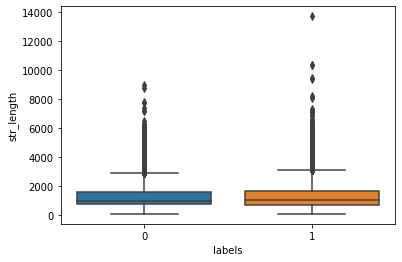

In [195]:
sns.boxplot(data = df_train,x = 'labels', y = 'str_length' )

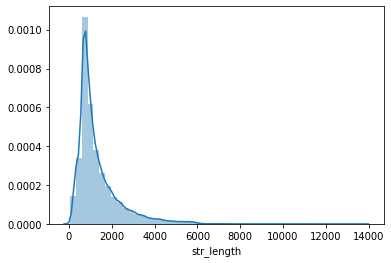

In [196]:
sns.distplot(df_train['str_length'])

/Users/annette/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/annette/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


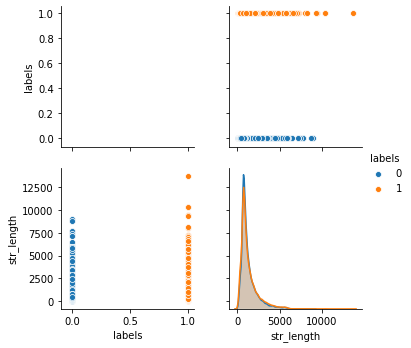

In [197]:
sns.pairplot(df_train, hue = "labels")

**Idenfity training and test data**

In [198]:
# Identify X_train and y_train
X_train = df_train['reviews']
y_train = df_train['labels']

In [199]:
# Identify X_test and y_yest
X_test = df_test['reviews']
y_test = df_test['labels']

**Create Baseline Model**
Guess all reviews in the test set are positive i.e. == 1

In [200]:
baseline = np.empty(len(y_train))
baseline.fill(1) # all positive reviews
baseline

array([1., 1., 1., ..., 1., 1., 1.])

**Test performance of baseline model**

In [201]:
# Confusion matrix
print(metrics.confusion_matrix(y_test,baseline))

[[    0 12500]
 [    0 12500]]


In [202]:
# Classification report
print(metrics.classification_report(y_test,baseline))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12500
           1       0.50      1.00      0.67     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



/Users/annette/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [203]:
# Accuracy
print(metrics.accuracy_score(y_test,baseline)) # 50% Accuracy

0.5


# Build pipeline to pre-process, then train and fit a model

## 1. Linear SVC Model

In [204]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [205]:
# Create pipeline
imdb_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

**Feed training data through pipeline**

In [206]:
imdb_clf.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

**Make Predictions for whether a review is positive or negative**

In [207]:
# Form a prediction set
predictions = imdb_clf.predict(X_test)

In [208]:
# Measure performance: confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[11104  1396]
 [ 1674 10826]]


In [209]:
# Classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     12500
           1       0.89      0.87      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [210]:
# Accuracy
print(metrics.accuracy_score(y_test,predictions))

0.8772


# 2. Logistic Regression Model

In [211]:
from sklearn.linear_model import LogisticRegression

In [212]:
imdb_log = Pipeline([('tfidf', TfidfVectorizer()),
                     ('logr', LogisticRegression()),
])

In [213]:
imdb_log.fit(X_train, y_train) 

/Users/annette/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('logr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scalin

In [214]:
log_predictions = imdb_log.predict(X_test)

In [215]:
# Measure performance: 
print(metrics.confusion_matrix(y_test,log_predictions))

[[11055  1445]
 [ 1476 11024]]


In [216]:
print(metrics.classification_report(y_test,log_predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [217]:
# Accuracy
print(metrics.accuracy_score(y_test,log_predictions))

0.88316


In [218]:
# Function returns result from a review
def print_review(var):
    if var ==0:
        print('negative')
    else:
        print('positive')

In [219]:
#A negative review
my_review1 = ["This movie is not really what I was expecting. \
                A lot of the characters were terrible."]

#A positive review
my_review2 = ["I would recommend that everyone sees this movie"]


In [220]:
# Test a positive review
my_predictions = imdb_log.predict(my_review2)

print_review(my_predictions)

positive
